# Regridding vectors with quiver

This example demonstrates the regridding functionality in quiver (there exists
equivalent functionality in :meth:`cartopy.mpl.geoaxes.GeoAxes.barbs`).

Regridding can be an effective way of visualising a vector field, particularly
if the data is dense or warped.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs

%matplotlib inline

def sample_data(shape=(20, 30)):
    """
    Returns ``(x, y, u, v, crs)`` of some vector data
    computed mathematically. The returned CRS will be a North Polar
    Stereographic projection, meaning that the vectors will be unevenly
    spaced in a PlateCarree projection.

    """
    crs = ccrs.NorthPolarStereo()
    scale = 1e7
    x = np.linspace(-scale, scale, shape[1])
    y = np.linspace(-scale, scale, shape[0])

    x2d, y2d = np.meshgrid(x, y)
    u = 10 * np.cos(2 * x2d / scale + 3 * y2d / scale)
    v = 20 * np.cos(6 * x2d / scale)

    return x, y, u, v, crs

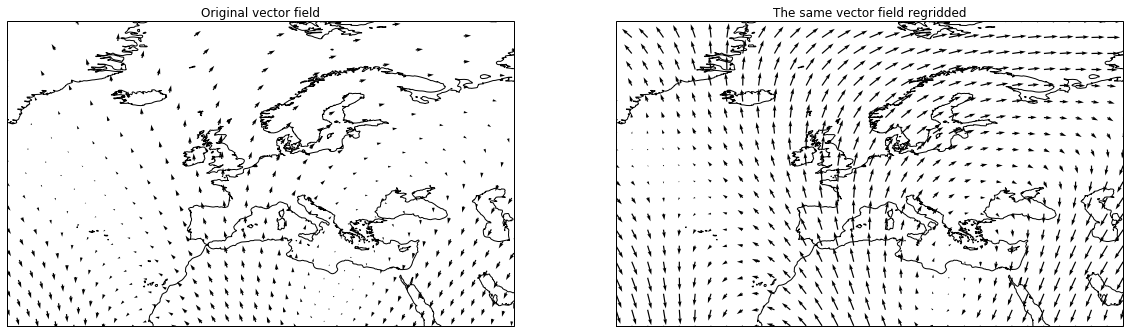

In [2]:
plt.figure(figsize=(20, 15))

x, y, u, v, vector_crs = sample_data(shape=(50, 50))
ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
plt.title('Original vector field')
ax1.coastlines('50m')
ax1.set_extent([-45, 55, 20, 80], ccrs.PlateCarree())
ax1.quiver(x, y, u, v, transform=vector_crs)

ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
plt.title('The same vector field regridded')
ax2.coastlines('50m')
ax2.set_extent([-45, 55, 20, 80], ccrs.PlateCarree())
ax2.quiver(x, y, u, v, transform=vector_crs, regrid_shape=20)

plt.show()